In [2]:
import tensorflow as tf
from keras import layers, models

2024-04-01 10:29:50.879544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [4]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
model = models.Sequential()

input_shape = (28,28,1)
num_classes = 10

model.add(layers.Conv2D(32, kernel_size = (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation = 'softmax'))

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# fit the model and show the validation accuracy in every epoch
history = model.fit(train_images, train_labels, epochs=15, validation_split=0.2,batch_size=32)
loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/15
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2382 - accuracy: 0.9269 - val_loss: 0.0733 - val_accuracy: 0.9792
Epoch 2/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0881 - accuracy: 0.9732 - val_loss: 0.0533 - val_accuracy: 0.9850
Epoch 3/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0686 - accuracy: 0.9785 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 4/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0442 - val_accuracy: 0.9882
Epoch 5/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0496 - accuracy: 0.9839 - val_loss: 0.0398 - val_accuracy: 0.9896
Epoch 6/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0460 - accuracy: 0.9850 - val_loss: 0.0395 - val_accuracy: 0.9883
Epoch 7/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0369 -

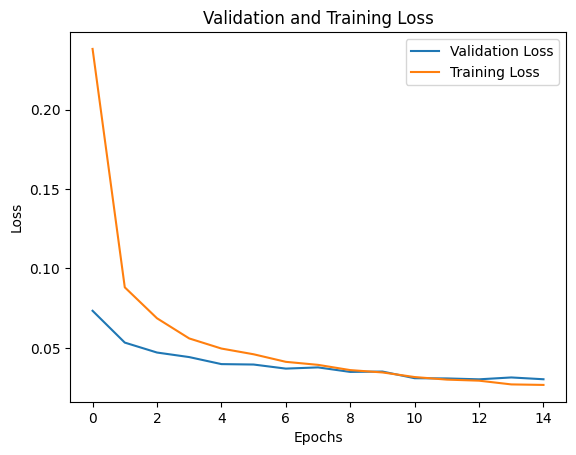

In [8]:
import matplotlib.pyplot as plt

# Assuming you have the validation loss and training loss stored in variables
# called val_loss and train_loss, respectively.

# Create the plot
plt.plot(val_loss, label='Validation Loss')
plt.plot(loss, label='Training Loss')

# Set the title and axis labels
plt.title('Validation and Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Display the plot
plt.show()

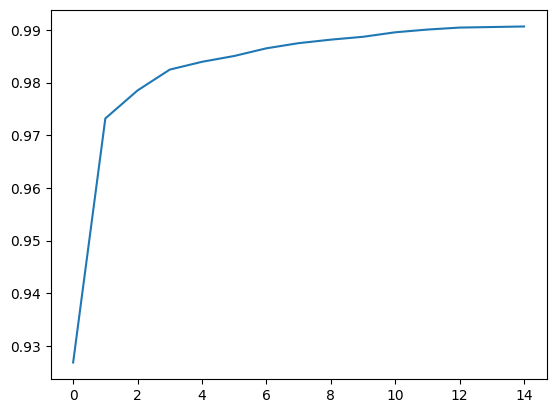

In [9]:
import matplotlib.pyplot as plt
#plot history 
plt.plot(history.history['accuracy'], label='accuracy')

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.9920


[0.023685360327363014, 0.9919999837875366]

In [41]:
model.save('new_model.h5')

/Users/uktamnishonov/.conda/envs/Refactored_Py_DS_ML_Bootcamp-master/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


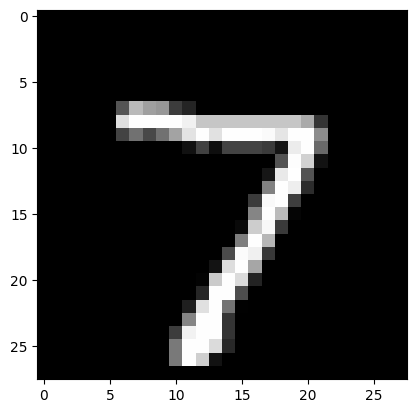

In [27]:
#plot the first image of test images
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')


In [34]:
model.predict(test_images[0].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 28ms/step


array([[3.2523223e-10, 1.6348704e-11, 6.3533079e-08, 1.6626286e-07,
        5.6367862e-12, 3.6182705e-13, 7.1139665e-20, 9.9999964e-01,
        1.7171418e-10, 1.2050494e-07]], dtype=float32)

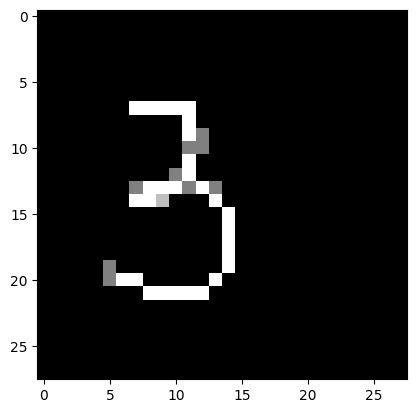

In [52]:
#plot the image in images folder named test
img = cv2.imread('captured_image.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = np.array(img).reshape(1, 28, 28, 1)
img = img.astype('uint8') / 255
plt.imshow(img.reshape(28, 28), cmap='gray')


In [56]:
#predict the image
model.predict(img)


1/1 [==============================] - 0s 84ms/step


array([[5.0093427e-06, 8.5530948e-04, 2.2043423e-03, 4.0682316e-01,
        1.5063235e-03, 5.8014077e-01, 1.8571636e-10, 7.7308179e-03,
        2.8930855e-04, 4.4504119e-04]], dtype=float32)

In [55]:
model = tf.keras.models.load_model('new_model.h5')

In [48]:
def preprocess_image_cv2(filepath):
    # Read the image
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))

    # Invert the image colors
    img = 255 - img

    # Normalize the pixel values
    img = img.astype('float32') / 255.0

    # Reshape the image to match the input shape of the model
    img = img.reshape(1, 28, 28, 1)

    return img


In [49]:
from PIL import Image

image = Image.open('captured_image.png')

# Preprocess the image for prediction
processed_image = preprocess_image_cv2('captured_image.png')

# Predict the digit
predictions = model.predict(processed_image)  # Extract predictions from the first item
print(predictions)

1/1 [==============================] - 0s 81ms/step
[[5.2924035e-03 4.8611715e-10 5.1626664e-01 3.4993298e-02 2.9039013e-06
  2.9521303e-03 1.8902977e-03 1.0448322e-08 3.0373403e-01 1.3486834e-01]]
